# Evaluation Notebook

In [2]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
data = 'wind_hourly_age_20251103'

results_dir = os.path.join('results', data)
result_files = os.listdir(results_dir)
# pickle files where training was performed on single dataset sequentially
sims = [f for f in result_files if (f.endswith('.pkl')) & ('cl' not in f) & ('fl' not in f)]
# pickle files where training was performed on concatenated datasets (centralized learning)
cl_sims = [f for f in result_files if 'cl' in f]
cl_sims.sort()
# pickle files for federated learning simulations
fl_sims = [f for f in result_files if 'fl' in f]
persistence_files = [f for f in result_files if 'persistence' in f]
persistence_file = None
if persistence_files:
    persistence_file = persistence_files[0]
    pers = pd.read_csv(os.path.join(results_dir, persistence_file))

In [4]:
def concatenate_results(results_dir: str,
                        results: list,
                        index_cols: list,
                        get_skill: bool = False,
                        pers: pd.DataFrame = pd.DataFrame(),
                        sort_skill: bool = False) -> pd.DataFrame:
    indices = defaultdict(list)
    metrics = []
    if not results:
        print('No data found.')
        return None
    # initialize the dict list
    for file in results:  # Iterate through all result files
        # Load the data
        with open(os.path.join(results_dir, file), 'rb') as f:
            pkl = pickle.load(f)
        df = pkl['evaluation']
        df.reset_index(inplace=True)
        if get_skill:
            df= pd.merge(df, pers[['RMSE', 'key', 'output_dim', 'freq']],
               on=['key', 'output_dim', 'freq'],
               how='left',
               suffixes=('', '_p'))
            df['Skill'] = 1 - df.RMSE / df.RMSE_p
            df.drop('RMSE_p', axis=1, inplace=True)
        for col in index_cols:
            indices[col].append(df[col].iloc[0])
        df.drop(index_cols, axis=1, inplace=True)
        #if len(df) != 1:
        #    df.drop('key', axis=1, inplace=True)
        metric = df.mean(axis=0)
        metrics.append(metric)
    df = pd.DataFrame(metrics, columns=metric.index)
    df_index = pd.DataFrame(indices)
    df = pd.concat([df, df_index], axis=1)
    df.sort_values(['output_dim', 'freq', 'Models'], inplace=True)
    if sort_skill:
        df.sort_values(['Skill'], ascending=False, inplace=True)
    return df

def read_sim(results_dir, sim):
    try:
        with open(os.path.join(results_dir, sim), 'rb') as f:
            sim_results = pickle.load(f)
    except:
        sim_results = None
    return sim_results

Federated simulation analysis - N datasets : 1 model

In [5]:
index_cols = ['Models', 'output_dim', 'freq', 't_0', 'strategy', 'personalization']
df_fl = concatenate_results(results_dir=results_dir,
                            results=fl_sims,
                            index_cols=index_cols)
df_fl[['R^2', 'RMSE', 'MAE', 'Skill', 'Models', 'strategy', 'personalization']].round(4).set_index('Models')

No data found.


TypeError: 'NoneType' object is not subscriptable

Centralized simulation analysis - N datasets : 1 model

In [5]:
index_cols = ['Models', 'output_dim', 'freq', 't_0', 'key']
df_cl = concatenate_results(results_dir=results_dir,
                             get_skill=False,
                             #pers=pers,
                             results=cl_sims,
                             index_cols=index_cols)
df_cl[['R^2', 'RMSE', 'MAE', 'Skill', 'Models', 'output_dim', 'key']].round(4).set_index('Models')

,R^2,RMSE,MAE,Skill,output_dim,key
Models,,,,,,
tcn-gru,0.6190,0.0356,0.0192,0.5297,48.0,synth_00164.csv
tcn-gru,0.6250,0.0353,0.0186,0.5334,48.0,synth_00164.csv
tcn-gru,0.6525,0.0340,0.0180,0.5508,48.0,synth_00164.csv
tcn-gru,0.7027,0.0314,0.0165,0.5845,48.0,synth_00164.csv
tcn-gru,0.5840,0.0372,0.0203,0.5085,48.0,synth_00164.csv
tcn-gru,0.6077,0.0361,0.0186,0.5227,48.0,synth_00164.csv
tcn-gru,0.7140,0.0308,0.0168,0.5925,48.0,synth_00164.csv
tcn-gru,0.6881,0.0424,0.0192,0.5631,48.0,synth_00164.csv
tcn-gru,0.7052,0.0413,0.0194,0.5753,48.0,synth_00164.csv


Individual simulation analysis

In [7]:
pd.set_option('display.max_rows', None)
fontsize = 12

In [6]:
for i, sim in enumerate(cl_sims):
    print(f'{i}: {sim}')

0: cl_m-tcn-gru_out-48_freq-1h_00164_20251121_1535.pkl
1: cl_m-tcn-gru_out-48_freq-1h_00164_20251121_1541.pkl
2: cl_m-tcn-gru_out-48_freq-1h_00164_20251121_1548.pkl
3: cl_m-tcn-gru_out-48_freq-1h_00164_20251121_1555.pkl
4: cl_m-tcn-gru_out-48_freq-1h_00164_20251121_1603.pkl
5: cl_m-tcn-gru_out-48_freq-1h_00164_20251121_1611.pkl
6: cl_m-tcn-gru_out-48_freq-1h_00164_20251121_1617.pkl
7: cl_m-tcn-gru_out-48_freq-1h_wind_00164_20251121_1630.pkl
8: cl_m-tcn-gru_out-48_freq-1h_wind_00164_20251121_1635.pkl
9: cl_m-tft_out-48_freq-1h_wind_20251123_0859.pkl
10: cl_m-tft_out-48_freq-1h_wind_20251123_0917.pkl
11: cl_m-tft_out-48_freq-1h_wind_20251124_0841.pkl
12: cl_m-tft_out-48_freq-1h_wind_20251124_0957.pkl
13: cl_m-tft_out-48_freq-1h_wind_20251124_1030.pkl
14: cl_m-tft_out-48_freq-1h_wind_seven_20251121_1728.pkl


In [7]:
cl_sim = cl_sims[13]
fl_sim = None#fl_sims[0]

In [14]:
cl_results = read_sim(results_dir, cl_sim)
fl_results = read_sim(results_dir, fl_sim)

In [20]:
params = cl_results['config']['params']
model_params = cl_results['config']['model']
hyperparameters = cl_results['hyperparameters']

print(f'known features: {params["known_features"]}')
print(f'observed features: {params["observed_features"]}')
print(f'station features: {params["static_features"]}')
print('---')
print(f'lookback: {model_params["lookback"]}')
print(f'output_dim: {model_params["output_dim"]}')
print('---')
print('hyperparameters:')
for params in hyperparameters.items():
    print(f'  {params[0]}: {params[1]}')

known features: ['wind_speed_nwp']
observed features: ['power']
station features: ['hub_height']
---
lookback: 48
output_dim: 48
---
hyperparameters:
  shuffle: True
  batch_size: 32
  epochs: 10
  lr: 0.0004
  horizon: 48
  lookback: 48
  n_heads: 6
  hidden_dim: 120
  dropout: 0.01


In [ ]:
cl_results['evaluation'][['R^2', 'RMSE', 'MAE', 'Skill', 'key']].round(4)

,R^2,RMSE,MAE,Skill,key
Models,,,,,
tft,0.7712,0.0439,0.0213,0.6361,synth_00164.csv
tft,0.6657,0.0591,0.0330,0.5545,synth_03362.csv
tft,0.7550,0.0305,0.0159,0.6202,synth_03631.csv
tft,0.7726,0.0538,0.0268,0.6353,synth_07370.csv
tft,0.7550,0.0305,0.0159,0.6202,synth_02638.csv
tft,0.8073,0.0684,0.0390,0.6629,synth_02932.csv
tft,0.7840,0.0484,0.0258,0.6433,synth_06163.csv
tft,0.7712,0.0439,0.0213,0.6361,synth_07374.csv
mean,0.7602,0.0473,0.0249,0.6261,NaN


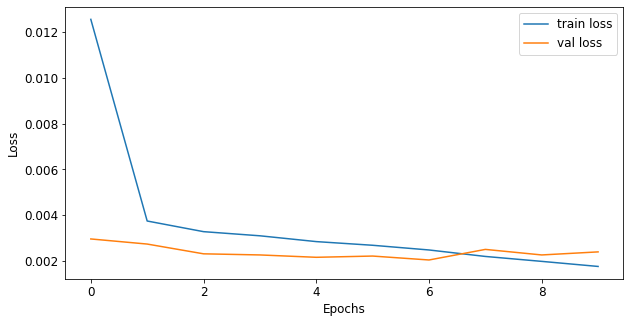

In [13]:
fig = plt.figure(figsize=(10, 5))

plt.plot(cl_results['history']['loss'], label='train loss')
plt.plot(cl_results['history']['val_loss'], label='val loss')
plt.xlabel('Epochs', size=fontsize)
plt.ylabel('Loss', size=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.show()

In [9]:
fl_results['evaluation'][['R^2', 'RMSE', 'MAE', 'Skill', 'key']].round(4).set_index('key')

,R^2,RMSE,MAE,Skill
key,,,,
station00.csv,0.9320,0.0597,0.0239,0.5601
station01.csv,0.9709,0.0519,0.0303,0.6646
station02.csv,0.9773,0.0388,0.0228,0.7357
station04.csv,0.9668,0.0700,0.0412,0.7133
station06.csv,0.9588,0.0431,0.0247,0.6057
station07.csv,0.9625,0.0478,0.0242,0.6704
station08.csv,0.9834,0.0324,0.0192,0.7807


In [12]:
fig = plt.figure(figsize=(10, 5))

plt.plot(fl_results['history']['metrics_aggregated']['train_loss'], label='train_loss')
plt.plot(fl_results['history']['metrics_aggregated']['eval_loss'], label='val_loss')
plt.xlabel('Epochs', size=fontsize)
plt.ylabel('Loss', size=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.show()

TypeError: 'NoneType' object is not subscriptable

<Figure size 720x360 with 0 Axes>